In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# use the inline backend to generate the plots within the browser
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')
%matplotlib inline
mpl.style.use('ggplot')  # optional: for ggplot-like style


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/video-sharing-mobile-app-data/train.csv
/kaggle/input/video-sharing-mobile-app-data/test.csv


In [2]:
train= pd.read_csv('../input/video-sharing-mobile-app-data/train.csv')
test= pd.read_csv('../input/video-sharing-mobile-app-data/test.csv')
train.shape

(89197, 10)

In [3]:
test.head()

,row_id,user_id,category_id,video_id,age,gender,profession,followers,views
0,89198,7986,12,42,14,Male,Student,180,138
1,89199,11278,34,115,14,Male,Student,230,840
2,89200,17245,8,110,44,Female,Working Professional,280,628
3,89201,9851,16,137,18,Male,Student,270,462
4,89202,16008,34,96,47,Female,Other,230,840


In [4]:
train[train['user_id']== 11278]

,row_id,user_id,category_id,video_id,age,gender,profession,followers,views,engagement_score
19431,19432,11278,34,94,14,Male,Student,230,840,4.09
25814,25815,11278,15,113,14,Male,Student,340,662,4.46
45307,45308,11278,15,32,14,Male,Student,340,662,4.41
52929,52930,11278,32,132,14,Male,Student,330,714,3.90
64710,64711,11278,34,95,14,Male,Student,230,840,3.87


In [5]:
train.head(10)

,row_id,user_id,category_id,video_id,age,gender,profession,followers,views,engagement_score
0,1,19990,37,128,24,Male,Student,180,1000,4.33
1,2,5304,32,132,14,Female,Student,330,714,1.79
2,3,1840,12,24,19,Male,Student,180,138,4.35
3,4,12597,23,112,19,Male,Student,220,613,3.77
4,5,13626,23,112,27,Male,Working Professional,220,613,3.13
5,6,9323,25,139,35,Male,Other,240,317,3.33
6,7,2071,7,14,23,Male,Student,160,467,3.80
7,8,21848,8,100,18,Male,Student,280,628,3.87
8,9,12896,3,4,15,Male,Student,270,621,2.88
9,10,16058,5,161,19,Male,Student,240,229,3.80


In [6]:
train[train['user_id']== 9851]

,row_id,user_id,category_id,video_id,age,gender,profession,followers,views,engagement_score
20045,20046,9851,16,34,18,Male,Student,270,462,3.11
21298,21299,9851,16,98,18,Male,Student,270,462,2.60
25476,25477,9851,39,116,18,Male,Student,270,89,2.80


In [7]:
test.head()

,row_id,user_id,category_id,video_id,age,gender,profession,followers,views
0,89198,7986,12,42,14,Male,Student,180,138
1,89199,11278,34,115,14,Male,Student,230,840
2,89200,17245,8,110,44,Female,Working Professional,280,628
3,89201,9851,16,137,18,Male,Student,270,462
4,89202,16008,34,96,47,Female,Other,230,840


In [8]:
len(train['category_id'].unique())

47

In [9]:
len(train['user_id'].unique())

27734

In [10]:
train['engagement_score'].describe()

count    89197.000000
mean         3.487797
std          0.863498
min          0.000000
25%          2.900000
50%          3.710000
75%          4.150000
max          5.000000
Name: engagement_score, dtype: float64

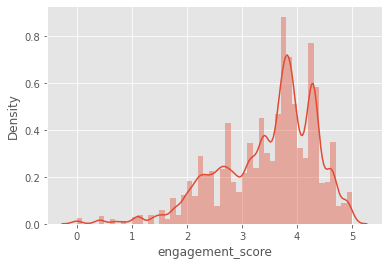

In [11]:
sns.distplot(train['engagement_score']);

In [12]:
#y_train_transf=np.log1p(train['engagement_score'])
#sns.distplot(y_train_transf, fit= norm)

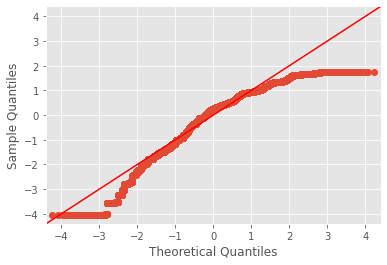

In [13]:
fig=sm.qqplot(train['engagement_score'],line='45',fit=True,dist=stats.norm)

<AxesSubplot:xlabel='engagement_score', ylabel='Density'>

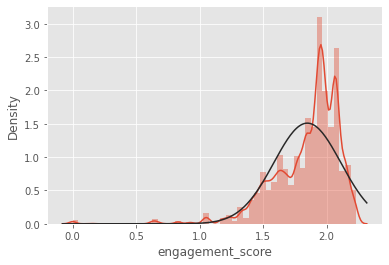

In [14]:
y_train_transf=np.sqrt(train['engagement_score'])
sns.distplot(y_train_transf, fit= norm)

In [15]:
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
row_id,0,0.0
user_id,0,0.0
category_id,0,0.0
video_id,0,0.0
age,0,0.0
gender,0,0.0
profession,0,0.0
followers,0,0.0
views,0,0.0
engagement_score,0,0.0


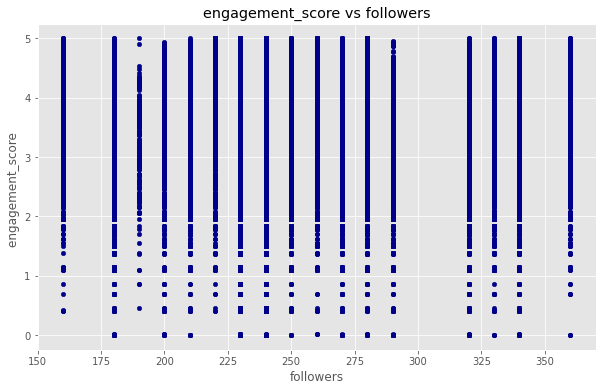

In [16]:
scatter_data=pd.concat([train['engagement_score'], train['followers']], axis=1)
scatter_data.head()
scatter_data.plot(kind='scatter', x='followers', y='engagement_score', figsize=(10, 6), color='darkblue')
plt.title('engagement_score vs followers')
plt.xlabel('followers')
plt.ylabel('engagement_score ')

plt.show()

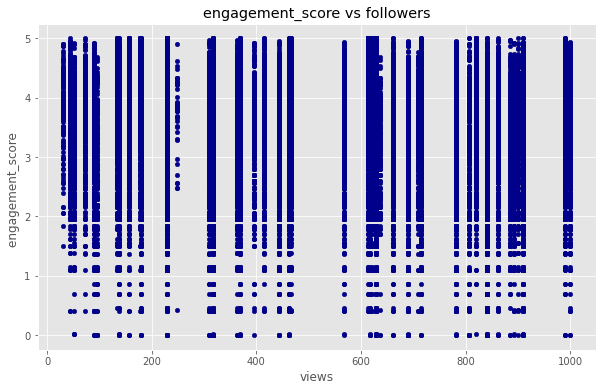

In [17]:
scatter_data=pd.concat([train['engagement_score'], train['views']], axis=1)
scatter_data.head()
scatter_data.plot(kind='scatter', x='views', y='engagement_score', figsize=(10, 6), color='darkblue')
plt.title('engagement_score vs followers')
plt.xlabel('views')
plt.ylabel('engagement_score ')

plt.show()

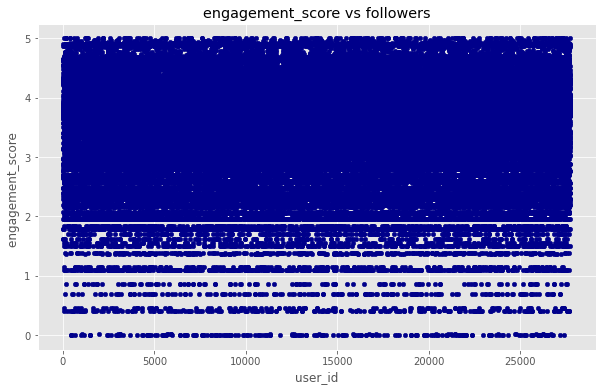

In [18]:
scatter_data=pd.concat([train['engagement_score'], train['user_id']], axis=1)
scatter_data.head()
scatter_data.plot(kind='scatter', x='user_id', y='engagement_score', figsize=(10, 6), color='darkblue')
plt.title('engagement_score vs followers')
plt.xlabel('user_id')
plt.ylabel('engagement_score ')

plt.show()

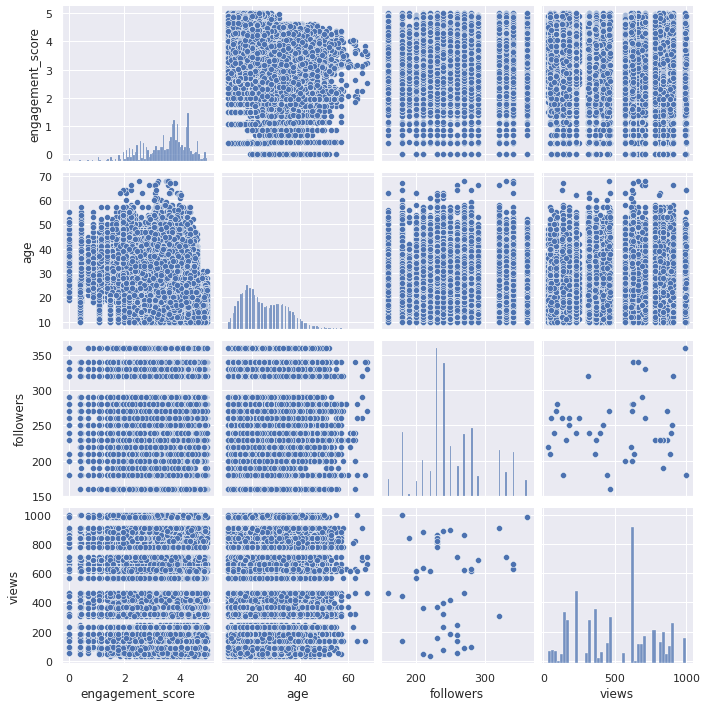

In [19]:
sns.set()
cols = ['engagement_score', 'age', 'followers', 'views']
sns.pairplot(train[cols], size = 2.5)
plt.show();

In [20]:
train['profession'].unique()

array(['Student', 'Working Professional', 'Other'], dtype=object)

In [21]:
y= train['engagement_score']
#train['category_id']=train['category_id'].astype(str)
data=train.drop(columns=['user_id','row_id','video_id','engagement_score'])
data=pd.get_dummies(data)

In [22]:
X_train,X_test,Y_train,Y_test=train_test_split(data,y,test_size=0.33)

In [23]:
Y_train.head()

580      3.91
85897    4.85
68489    1.96
58052    4.02
32126    3.63
Name: engagement_score, dtype: float64

In [24]:
X_train.head()

,category_id,age,followers,views,gender_Female,gender_Male,profession_Other,profession_Student,profession_Working Professional
580,19,40,230,369,0,1,1,0,0
85897,3,15,270,621,1,0,0,1,0
68489,37,26,180,1000,1,0,0,0,1
58052,36,46,260,178,1,0,0,0,1
32126,19,28,230,369,0,1,0,0,1


In [25]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, Y_train)
reg.score(X_train, Y_train)

0.2730965815128711

In [26]:
X_train.shape

(59761, 9)

In [27]:
Y_train.shape

(59761,)

In [28]:

# check xgboost version
import xgboost as xg
from sklearn.metrics import mean_squared_error as MSE

In [29]:
xgb_r = xg.XGBRegressor(objective ='reg:linear',
                  n_estimators = 10, seed = 123)

In [30]:
xgb_r.fit(X_train, Y_train)


[06:19:40] WARNING: ../src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=10, n_jobs=4,
             num_parallel_tree=1, objective='reg:linear', predictor='auto',
             random_state=123, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=123, subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [31]:
xgb_r.score(X_train,Y_train)

0.3484080513409584

In [32]:
pred = xgb_r.predict(X_test)
rmse = np.sqrt(MSE(Y_test, pred))
print("RMSE : % f" %(rmse))

RMSE :  0.705308


In [33]:
#Validation function
from sklearn.linear_model import Lasso 
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, cross_val_score, train_test_split
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X_train.values)
    rmse= np.sqrt(-cross_val_score(model, X_train.values, Y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 0.7366 (0.0044)



In [34]:
test[test['user_id']==11278]

,row_id,user_id,category_id,video_id,age,gender,profession,followers,views
1,89199,11278,34,115,14,Male,Student,230,840
8636,97834,11278,15,33,14,Male,Student,340,662


In [35]:
train[train['user_id']==11278]

,row_id,user_id,category_id,video_id,age,gender,profession,followers,views,engagement_score
19431,19432,11278,34,94,14,Male,Student,230,840,4.09
25814,25815,11278,15,113,14,Male,Student,340,662,4.46
45307,45308,11278,15,32,14,Male,Student,340,662,4.41
52929,52930,11278,32,132,14,Male,Student,330,714,3.90
64710,64711,11278,34,95,14,Male,Student,230,840,3.87


In [36]:
#solution[solution['user_id']==11278]

In [37]:
tastes = pd.merge(test, train, how='inner', on=['user_id', 'category_id'])
#tastes2=tastes.groupby(['user_id','category_id']).mean()
tastes2=tastes.groupby(['user_id','category_id'], as_index=False)['engagement_score'].median()

tastes2.head()

,user_id,category_id,engagement_score
0,2,4,2.760
1,3,5,4.320
2,6,10,4.370
3,16,19,3.230
4,21,5,3.425


In [38]:
tastes2[tastes2['user_id']==11278]

,user_id,category_id,engagement_score
4514,11278,15,4.435
4515,11278,34,3.980


In [39]:
test.shape

(11121, 9)

In [40]:
solution=pd.merge(test,tastes2,how='left', on =['user_id','category_id'])
solution.head()


,row_id,user_id,category_id,video_id,age,gender,profession,followers,views,engagement_score
0,89198,7986,12,42,14,Male,Student,180,138,4.195
1,89199,11278,34,115,14,Male,Student,230,840,3.980
2,89200,17245,8,110,44,Female,Working Professional,280,628,2.400
3,89201,9851,16,137,18,Male,Student,270,462,2.855
4,89202,16008,34,96,47,Female,Other,230,840,2.080


In [41]:
solution.shape

(11121, 10)

In [42]:
solution2=solution[['row_id','engagement_score']]
solution2.head()

,row_id,engagement_score
0,89198,4.195
1,89199,3.980
2,89200,2.400
3,89201,2.855
4,89202,2.080


In [43]:
solution2.to_csv('submission.csv', index=False)

In [44]:
train.head()

,row_id,user_id,category_id,video_id,age,gender,profession,followers,views,engagement_score
0,1,19990,37,128,24,Male,Student,180,1000,4.33
1,2,5304,32,132,14,Female,Student,330,714,1.79
2,3,1840,12,24,19,Male,Student,180,138,4.35
3,4,12597,23,112,19,Male,Student,220,613,3.77
4,5,13626,23,112,27,Male,Working Professional,220,613,3.13


In [45]:
inputMovies=train[train['user_id']==19990]
inputMovies

,row_id,user_id,category_id,video_id,age,gender,profession,followers,views,engagement_score
0,1,19990,37,128,24,Male,Student,180,1000,4.33
10943,10944,19990,43,148,24,Male,Student,280,617,4.77
58217,58218,19990,43,149,24,Male,Student,280,617,4.92


In [46]:
#Filtering out users that have watched movies that the input has watched and storing it
userSubset = train[train['video_id'].isin(inputMovies['video_id'].tolist())]
userSubset.head()

,row_id,user_id,category_id,video_id,age,gender,profession,followers,views,engagement_score
0,1,19990,37,128,24,Male,Student,180,1000,4.33
46,47,19335,43,148,30,Male,Working Professional,280,617,3.71
164,165,6328,43,149,33,Male,Working Professional,280,617,3.99
186,187,19470,43,149,19,Male,Student,280,617,4.56
219,220,16563,43,148,30,Male,Working Professional,280,617,2.16


In [47]:
#Groupby creates several sub dataframes where they all have the same value in the column specified as the parameter
userSubsetGroup = userSubset.groupby(['user_id'])

In [48]:
userSubsetGroup.get_group(19335)

,row_id,user_id,category_id,video_id,age,gender,profession,followers,views,engagement_score
46,47,19335,43,148,30,Male,Working Professional,280,617,3.71
75260,75261,19335,43,149,30,Male,Working Professional,280,617,3.98


In [49]:
#Sorting it so users with movie most in common with the input will have priority
userSubsetGroup = sorted(userSubsetGroup,  key=lambda x: len(x[1]), reverse=True)


In [50]:
userSubsetGroup[0:3]

[(98,
         row_id  user_id  category_id  video_id  age  gender profession  \
  16393   16394       98           37       128   18  Female    Student   
  56286   56287       98           43       148   18  Female    Student   
  70074   70075       98           43       149   18  Female    Student   
  
         followers  views  engagement_score  
  16393        180   1000              3.04  
  56286        280    617              3.66  
  70074        280    617              3.90  ),
 (728,
         row_id  user_id  category_id  video_id  age  gender profession  \
  20348   20349      728           43       149   42  Female      Other   
  45510   45511      728           37       128   42  Female      Other   
  73136   73137      728           43       148   42  Female      Other   
  
         followers  views  engagement_score  
  20348        280    617              2.64  
  45510        180   1000              4.51  
  73136        280    617              2.56  ),
 (909,
  

In [51]:
userSubsetGroup = userSubsetGroup[0:100]

In [52]:
#Store the Pearson Correlation in a dictionary, where the key is the user Id and the value is the coefficient
pearsonCorrelationDict = {}
from math import sqrt
#For every user group in our subset
for name, group in userSubsetGroup:
    #Let's start by sorting the input and current user group so the values aren't mixed up later on
    group = group.sort_values(by='video_id')
    inputMovies = inputMovies.sort_values(by='video_id')
    #Get the N for the formula
    nRatings = len(group)
    #Get the review scores for the movies that they both have in common
    temp_df = inputMovies[inputMovies['video_id'].isin(group['video_id'].tolist())]
    #And then store them in a temporary buffer variable in a list format to facilitate future calculations
    tempRatingList = temp_df['engagement_score'].tolist()
    #Let's also put the current user group reviews in a list format
    tempGroupList = group['engagement_score'].tolist()
    #Now let's calculate the pearson correlation between two users, so called, x and y
    Sxx = sum([i**2 for i in tempRatingList]) - pow(sum(tempRatingList),2)/float(nRatings)
    Syy = sum([i**2 for i in tempGroupList]) - pow(sum(tempGroupList),2)/float(nRatings)
    Sxy = sum( i*j for i, j in zip(tempRatingList, tempGroupList)) - sum(tempRatingList)*sum(tempGroupList)/float(nRatings)
    
    #If the denominator is different than zero, then divide, else, 0 correlation.
    if Sxx != 0 and Syy != 0:
        pearsonCorrelationDict[name] = Sxy/sqrt(Sxx*Syy)
    else:
        pearsonCorrelationDict[name] = 0

In [53]:
pearsonCorrelationDict.items()

dict_items([(98, 0.9996427219181666), (728, -0.9601260484776637), (909, 0.9993519359544398), (1258, 0.47236203682022204), (1471, 0.9273546142906607), (1998, 0.9036469081777933), (2467, 0.9916904600361559), (2838, 0.986080811183978), (3328, 0.23428844579306177), (3633, -0.6904754011277767), (4050, 0.9955546419374296), (4229, 0.9752062164561294), (4510, 0.7433503779976627), (5194, 0.9803384832207797), (5244, 0.9995458891327285), (5527, 0.9738934556775991), (5711, 0.9635549446365754), (6451, 0.9921062047157875), (6858, 0.9643153465734822), (6860, 0.7255965292797993), (7145, -0.8031513305215079), (7171, -0.3770617999195541), (7244, 0.998728023720474), (7295, 0.9972602708696879), (7341, 0.40743823586516487), (7446, -0.8196561646731049), (7673, -0.370979845348503), (7857, 0.9601083411492497), (8003, 0.9910163723987884), (8102, 0.9668479974849918), (8202, 0.2510088019760444), (8538, 0.9878291611472829), (9029, 0.9740153926300128), (9281, -0.30314767614894694), (9344, 0.9928703686867106), (100

In [54]:
pearsonDF = pd.DataFrame.from_dict(pearsonCorrelationDict, orient='index')
pearsonDF.columns = ['similarityIndex']
pearsonDF['user_id'] = pearsonDF.index
pearsonDF.index = range(len(pearsonDF))


In [55]:
topUsers=pearsonDF.sort_values(by='similarityIndex', ascending=False)[0:50]
topUsers.head(500)

,similarityIndex,user_id
98,1.000000,500
97,1.000000,394
94,1.000000,168
96,1.000000,310
65,1.000000,19990
95,1.000000,286
36,0.999995,10395
57,0.999975,17897
38,0.999710,11857
39,0.999690,12443


In [56]:
topUsersRating=topUsers.merge(train, left_on='user_id', right_on='user_id', how='inner')
topUsersRating.head()

,similarityIndex,user_id,row_id,category_id,video_id,age,gender,profession,followers,views,engagement_score
0,1.0,500,1552,43,149,43,Female,Working Professional,280,617,4.05
1,1.0,500,50923,43,148,43,Female,Working Professional,280,617,2.40
2,1.0,394,51472,36,127,29,Female,Working Professional,260,178,1.96
3,1.0,394,65676,43,149,29,Female,Working Professional,280,617,3.65
4,1.0,394,69870,43,148,29,Female,Working Professional,280,617,1.84


In [57]:
train[train['user_id']==8280]

,row_id,user_id,category_id,video_id,age,gender,profession,followers,views,engagement_score
23403,23404,8280,35,126,31,Male,Other,260,134,3.91
32235,32236,8280,43,148,31,Male,Other,280,617,4.60
36911,36912,8280,43,149,31,Male,Other,280,617,4.61
55669,55670,8280,35,106,31,Male,Other,260,134,4.48
63641,63642,8280,37,108,31,Male,Other,180,1000,3.97


In [58]:
#Multiplies the similarity by the user's ratings
topUsersRating['weightedRating'] = topUsersRating['similarityIndex']*topUsersRating['engagement_score']
topUsersRating.head()

,similarityIndex,user_id,row_id,category_id,video_id,age,gender,profession,followers,views,engagement_score,weightedRating
0,1.0,500,1552,43,149,43,Female,Working Professional,280,617,4.05,4.05
1,1.0,500,50923,43,148,43,Female,Working Professional,280,617,2.40,2.40
2,1.0,394,51472,36,127,29,Female,Working Professional,260,178,1.96,1.96
3,1.0,394,65676,43,149,29,Female,Working Professional,280,617,3.65,3.65
4,1.0,394,69870,43,148,29,Female,Working Professional,280,617,1.84,1.84


In [59]:
#Applies a sum to the topUsers after grouping it up by userId
tempTopUsersRating = topUsersRating.groupby('video_id').sum()[['similarityIndex','weightedRating']]
tempTopUsersRating.columns = ['sum_similarityIndex','sum_weightedRating']
tempTopUsersRating.head()

,sum_similarityIndex,sum_weightedRating
video_id,,
106,7.843321,32.365969
107,9.931940,39.883221
108,21.778595,61.864232
126,5.875433,18.024184
127,15.892976,57.828312


In [60]:
#Creates an empty dataframe
recommendation_df = pd.DataFrame()
#Now we take the weighted average
recommendation_df['weighted average recommendation score'] = tempTopUsersRating['sum_weightedRating']/tempTopUsersRating['sum_similarityIndex']
recommendation_df['video_id'] = tempTopUsersRating.index
recommendation_df['user_id'] = 19990
recommendation_df.head()

,weighted average recommendation score,video_id,user_id
video_id,,,
106,4.126564,106,19990
107,4.015652,107,19990
108,2.840598,108,19990
126,3.067720,126,19990
127,3.638608,127,19990


In [61]:
recommendation_df = recommendation_df.sort_values(by='weighted average recommendation score', ascending=False)


In [62]:
train

,row_id,user_id,category_id,video_id,age,gender,profession,followers,views,engagement_score
0,1,19990,37,128,24,Male,Student,180,1000,4.33
1,2,5304,32,132,14,Female,Student,330,714,1.79
2,3,1840,12,24,19,Male,Student,180,138,4.35
3,4,12597,23,112,19,Male,Student,220,613,3.77
4,5,13626,23,112,27,Male,Working Professional,220,613,3.13
...,...,...,...,...,...,...,...,...,...,...
89192,89193,23996,15,32,25,Male,Other,340,662,3.91
89193,89194,20466,20,47,31,Male,Other,240,892,3.56
89194,89195,13655,16,97,25,Male,Student,270,462,4.23
89195,89196,24840,9,18,35,Male,Working Professional,230,819,3.77
